In [127]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import warnings

columns=['Position', 'Speed', 'Time', 'Started']

# Load .log file
with open('./arduino/putty.log', 'r') as f:
    lines = f.readlines()

    # Remove first and last lines
    lines = lines[2:-1]

    df = pd.DataFrame([l.split(',') for l in lines], columns=columns)

warnings.filterwarnings("ignore")

In [128]:
# Convert to numeric
for column in columns:
    df[column] = pd.to_numeric(df[column])

df.head()

,Position,Speed,Time,Started
0,0,0.0,2382408,0
1,0,0.0,2383256,0
2,0,0.0,2384104,0
3,0,0.0,2384952,0
4,0,0.0,2385792,0


<Axes: xlabel='Time'>

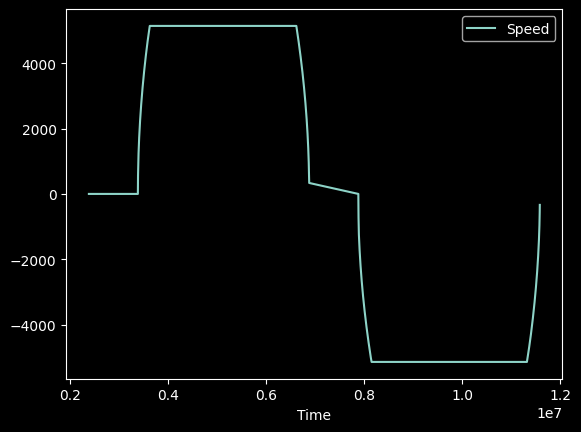

In [129]:
df.plot(x='Time', y='Speed')

In [130]:
df.max()

Position        1759.00
Speed           5144.66
Time        11579568.00
Started            1.00
dtype: float64

In [131]:
df.tail()

,Position,Speed,Time,Started
4172,5,-963.48,11572080,1
4173,4,-850.13,11573948,1
4174,3,-719.34,11575820,1
4175,2,-559.49,11577692,1
4176,1,-335.69,11579568,1


In [132]:
df = df[:-3]
df.tail()

,Position,Speed,Time,Started
4169,8,-1243.24,11566224,1
4170,7,-1157.50,11568176,1
4171,6,-1064.90,11570124,1
4172,5,-963.48,11572080,1
4173,4,-850.13,11573948,1


In [133]:
# Calculate angle from position
spr = 1600

df['Angle'] = df['Position'].apply(lambda x: x * 360 / spr)
df['Radian'] = df['Angle'].apply(lambda x: x * 3.14159 / 180)
df['Speed'] = df['Speed'] * (2 * np.pi) / spr
df['Time'] = df['Time'] - df['Time'].min() / 1000000
df['Acceleration'] = df['Speed'].diff() / df['Time'].diff()
df.head()

,Position,Speed,Time,Started,Angle,Radian,Acceleration
0,0,0.0,2.382406e+06,0,0.0,0.0,NaN
1,0,0.0,2.383254e+06,0,0.0,0.0,0.0
2,0,0.0,2.384102e+06,0,0.0,0.0,0.0
3,0,0.0,2.384950e+06,0,0.0,0.0,0.0
4,0,0.0,2.385790e+06,0,0.0,0.0,0.0


In [134]:
# move time column to the end
df = df[['Position', 'Angle', 'Radian', 'Speed', 'Acceleration', 'Time']]
df.head()

,Position,Angle,Radian,Speed,Acceleration,Time
0,0,0.0,0.0,0.0,NaN,2.382406e+06
1,0,0.0,0.0,0.0,0.0,2.383254e+06
2,0,0.0,0.0,0.0,0.0,2.384102e+06
3,0,0.0,0.0,0.0,0.0,2.384950e+06
4,0,0.0,0.0,0.0,0.0,2.385790e+06


In [135]:
df.max()

Position        1.759000e+03
Angle           3.957750e+02
Radian          6.907571e+00
Speed           2.020303e+01
Acceleration    1.155817e-03
Time            1.157395e+07
dtype: float64

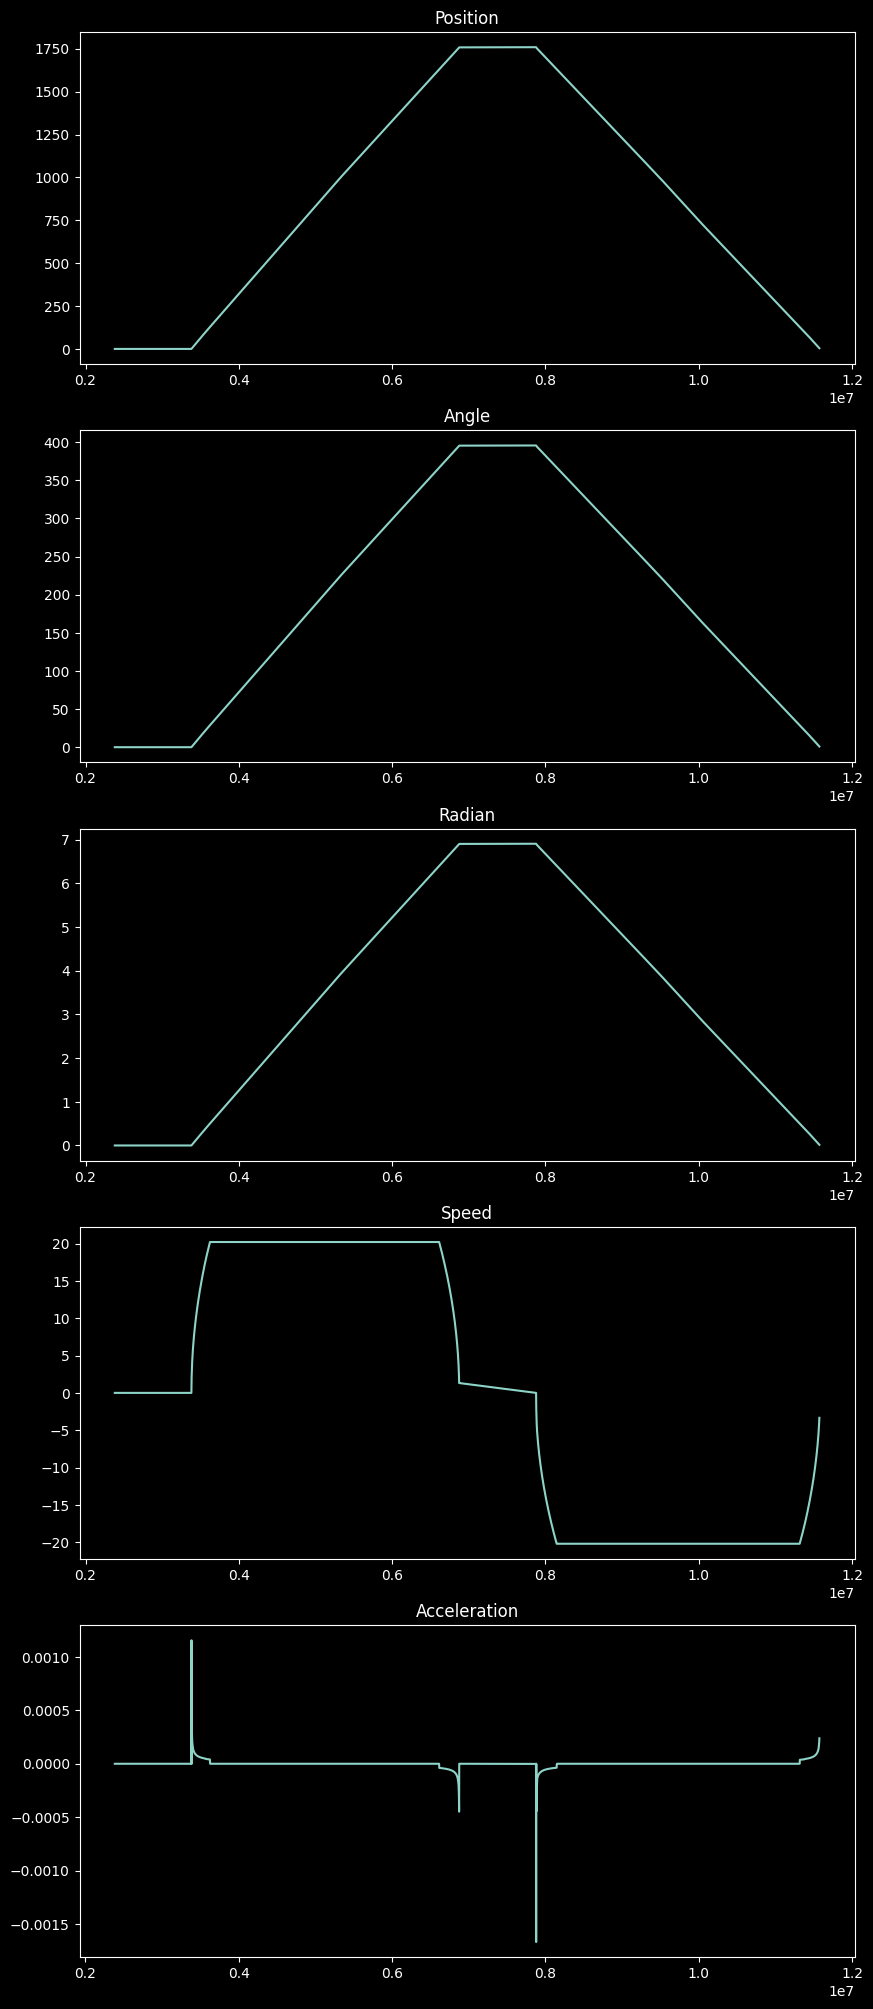

In [136]:
# Plot
columns = df.columns.tolist()
fig, ax = plt.subplots(len(columns) - 1, 1, figsize=(10, 25))
for i, column in enumerate(columns[:-1]):
    ax[i].plot(df['Time'], df[column])
    ax[i].set_title(column)

plt.show()

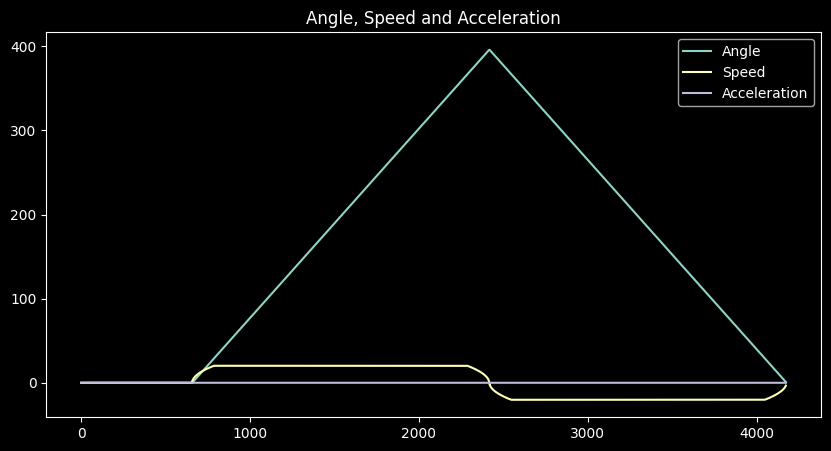

In [137]:
# On the same plot
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
df['Angle'].plot(ax=ax)
df['Speed'].plot(ax=ax)
df['Acceleration'].plot(ax=ax)

# Add legend and set title
ax.legend(['Angle', 'Speed', 'Acceleration'])
ax.set_title('Angle, Speed and Acceleration')

plt.show()

In [138]:
from matplotlib import pyplot as plt
import pandas as pd

# Load .log file
with open('./arduino/experiment.log', 'r') as f:
    lines = f.readlines()

    # Remove first and last lines
    columns = lines[2].split(',')
    columns = [c.strip() for c in columns]
    lines = lines[6:-1]
    
    df = pd.DataFrame([l.split(',') for l in lines], columns=columns)

In [139]:
# Convert to numeric
for column in columns:
    df[column] = pd.to_numeric(df[column])

# df[1100:1105]
df.head()

,Raw Input,Time,Started
0,85,5276345,0
1,85,5277914,0
2,85,5279512,0
3,84,5281101,0
4,84,5282689,0


<Axes: xlabel='Time'>

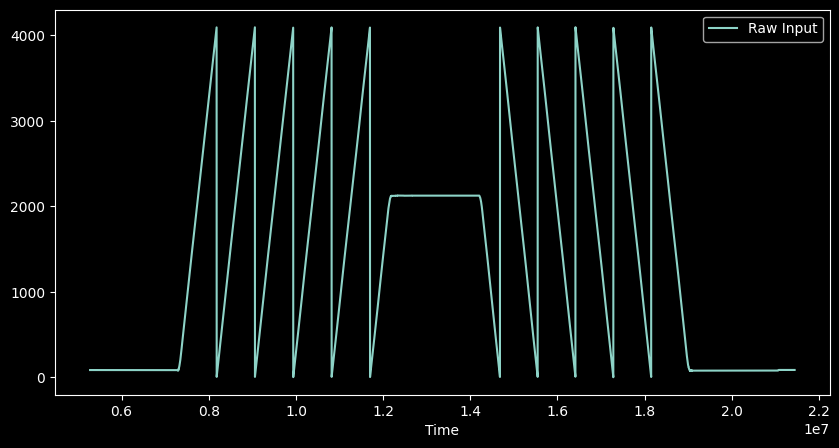

In [140]:
df.plot(x='Time', y='Raw Input', figsize=(10, 5))

In [141]:
# Set starting time to 0
df['Time'] = df['Time'] - df['Time'].min()

"""4092 + 4 = 4096 -> 0
4093 + 4 = 4097 -> 1
4094 + 4 = 4098 -> 2
4095 + 4 = 4099 -> 3
4096 + 4 = 4100 -> 4"""
diff = 4096 - df['Raw Input'].iloc[0] + 2
df['Raw Input'] = df['Raw Input'].apply(lambda x: abs(4096 - (x + diff)) if x + diff > 4095 else x)
diff

4013

In [142]:
df['Angle'] = df['Raw Input'].apply(lambda x: x * 360 / 4095)

continuous_angle = [df['Angle'].iloc[0]]

# Calculate into continuous angle
for i in range(1, len(df)):
    delta_angle = df['Angle'][i] - df['Angle'][i - 1]
    if delta_angle > 180:
        delta_angle -= 360
    elif delta_angle < -180:
        delta_angle += 360

    continuous_angle.append(continuous_angle[-1] + delta_angle)

df['Angle'] = continuous_angle


df[1105:1110]

,Raw Input,Time,Started,Angle
1105,2,1754095,0,0.175824
1106,2,1755687,0,0.175824
1107,2,1757277,0,0.175824
1108,2,1758866,0,0.175824
1109,2,1760443,0,0.175824


In [143]:
df['Time'] = df['Time'] / 1000000
df.head()

,Raw Input,Time,Started,Angle
0,2,0.000000,0,0.175824
1,2,0.001569,0,0.175824
2,2,0.003167,0,0.175824
3,1,0.004756,0,0.087912
4,1,0.006344,0,0.087912


In [144]:
df['Radian'] = df['Angle'].apply(lambda x: x * 3.14159 / 180)
df['Angular Velocity'] = df['Radian'].diff() / df['Time'].diff()

y_columns = ['Time', 'Started']

columns = df.columns.tolist()
columns = [c for c in columns if c not in y_columns] + y_columns
df = df[columns]

df[1100:1105]

,Raw Input,Angle,Radian,Angular Velocity,Time,Started
1100,2,0.175824,0.003069,0.971725,1.746160,0
1101,2,0.175824,0.003069,0.000000,1.747744,0
1102,2,0.175824,0.003069,0.000000,1.749334,0
1103,1,0.087912,0.001534,-0.965610,1.750923,0
1104,1,0.087912,0.001534,0.000000,1.752499,0


In [145]:
columns = ['Raw Input', 'Angle', 'Radian', 'Angular Velocity', 'Started', 'Time']
df = df[columns]
df.head()

,Raw Input,Angle,Radian,Angular Velocity,Started,Time
0,2,0.175824,0.003069,NaN,0,0.000000
1,2,0.175824,0.003069,0.00000,0,0.001569
2,2,0.175824,0.003069,0.00000,0,0.003167
3,1,0.087912,0.001534,-0.96561,0,0.004756
4,1,0.087912,0.001534,0.00000,0,0.006344


In [146]:
# cut off at 4 seconds
df = df[df['Time'] > 1]

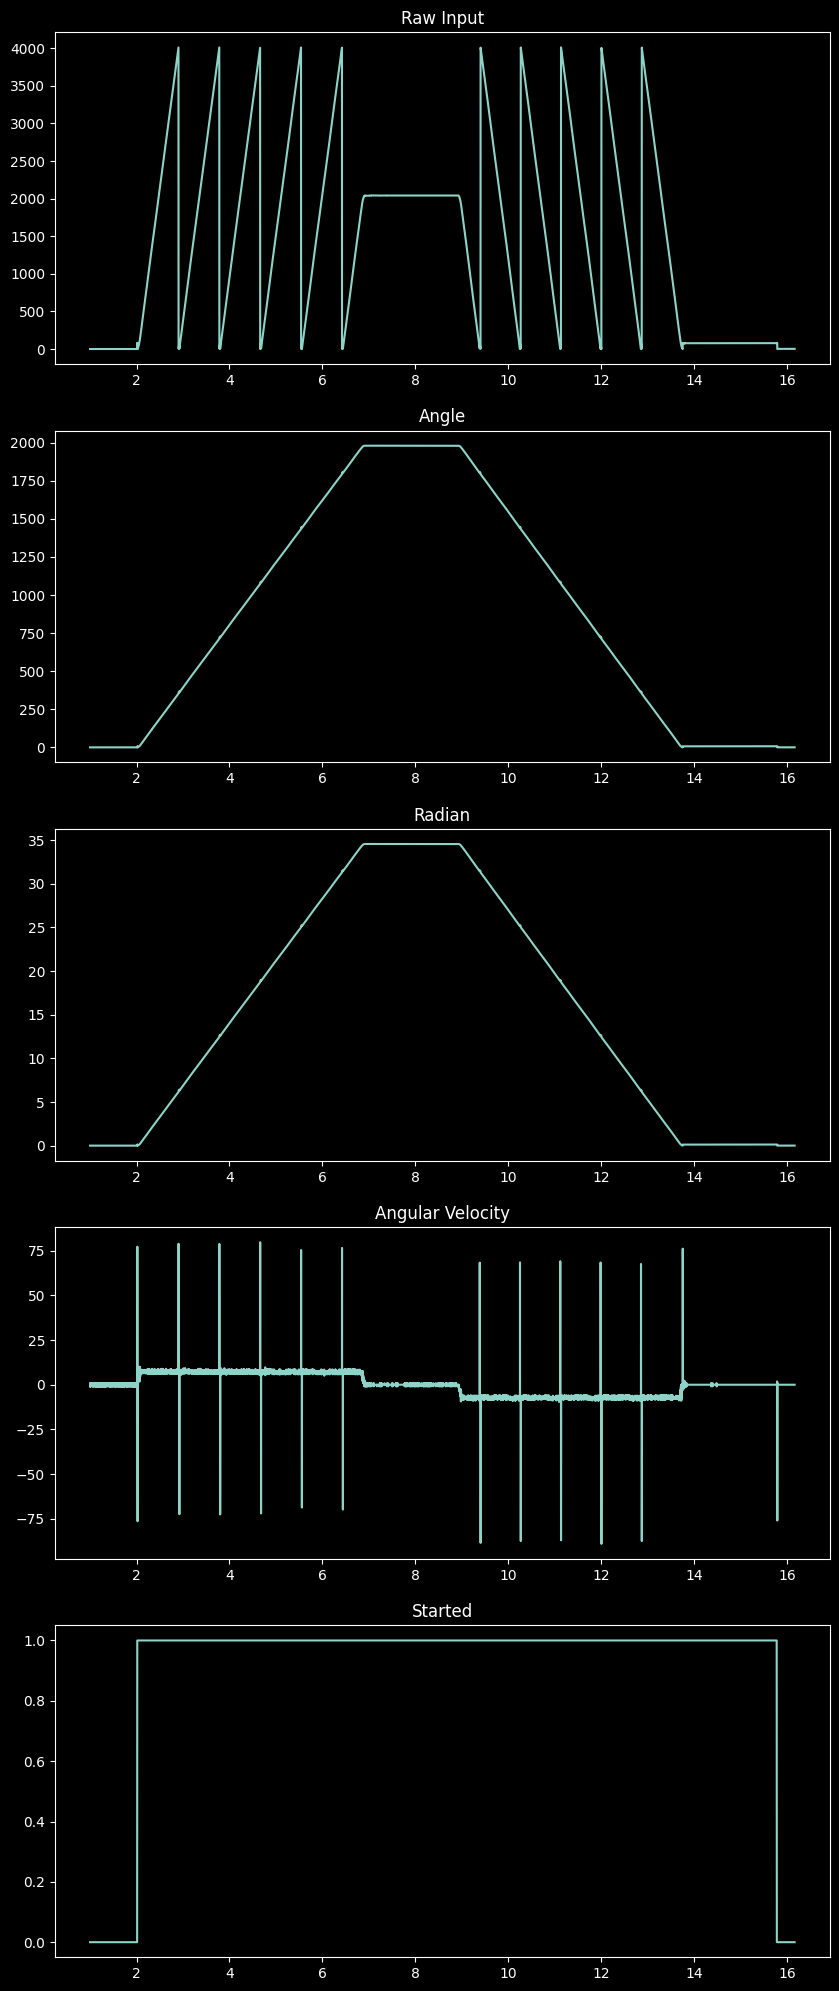

In [147]:
# Plot
fig, ax = plt.subplots(len(columns) - 1, 1, figsize=(10, 25))
for i, column in enumerate(columns[:-1]):
    ax[i].plot(df['Time'], df[column])
    ax[i].set_title(column)

plt.show()

In [148]:
import numpy as np
from scipy.signal import butter, filtfilt

dfCopy = df.copy()
dfCopy['Time'] = dfCopy['Time'] - dfCopy['Time'].min()

# Calculate angular velocity
dfCopy['Angular Velocity'] = dfCopy['Radian'].diff() / dfCopy['Time'].diff()
dfCopy['Angular Velocity'] = dfCopy['Angular Velocity'].fillna(0)

# Apply low pass filter
dfCopy['Angular Velocity Filtered'] = dfCopy['Angular Velocity'].rolling(window=10).mean()
dfCopy[600:605]

,Raw Input,Angle,Radian,Angular Velocity,Started,Time,Angular Velocity Filtered
1230,2,0.175824,0.003069,0.968658,0,0.952457,0.097348
1231,1,0.087912,0.001534,-0.960773,0,0.954054,0.001271
1232,1,0.087912,0.001534,0.000000,0,0.955652,0.001271
1233,1,0.087912,0.001534,0.000000,0,0.957226,-0.095169
1234,1,0.087912,0.001534,0.000000,0,0.958791,-0.095169


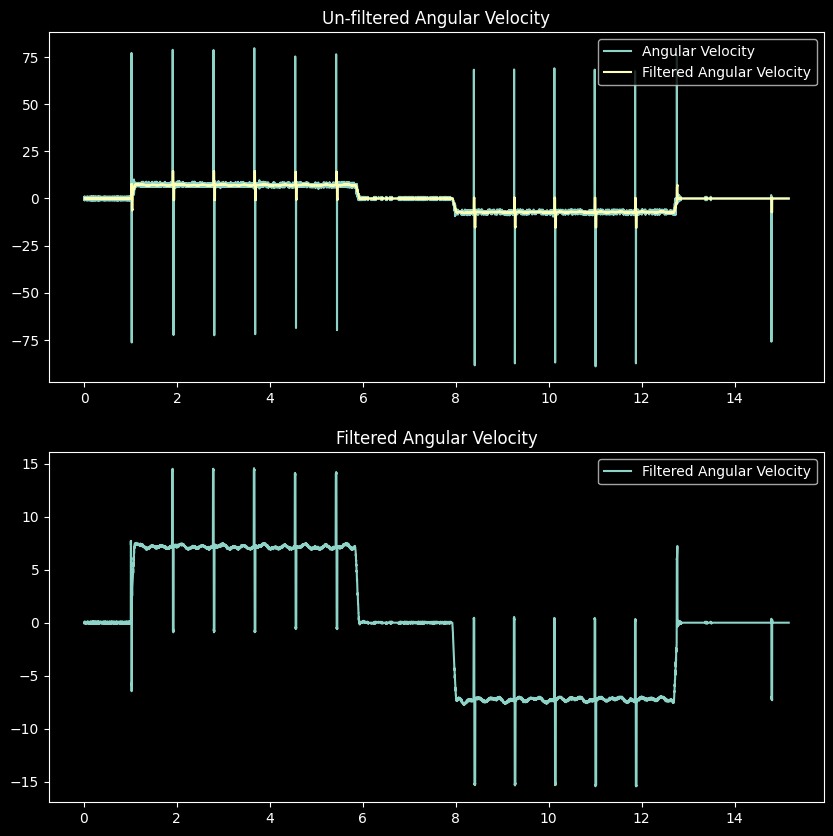

In [149]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(dfCopy['Time'], dfCopy['Angular Velocity'])
ax[0].plot(dfCopy['Time'], dfCopy['Angular Velocity Filtered'])
ax[1].plot(dfCopy['Time'], dfCopy['Angular Velocity Filtered'])

ax[0].set_title('Un-filtered Angular Velocity')
ax[1].set_title('Filtered Angular Velocity')

ax[0].legend(['Angular Velocity', 'Filtered Angular Velocity'])
ax[1].legend(['Filtered Angular Velocity'])

In [150]:
dfCopy.max()

Raw Input                    4012.000000
Angle                        1979.692308
Radian                         34.552120
Angular Velocity               79.683709
Started                         1.000000
Time                           15.164174
Angular Velocity Filtered      14.576596
dtype: float64

In [151]:
df2sec = dfCopy[dfCopy['Time'].between(1.8, 5.5)]
df2sec.head()

,Raw Input,Angle,Radian,Angular Velocity,Started,Time,Angular Velocity Filtered
1727,3535,310.769231,5.423942,7.918112,1,1.800250,7.068234
1728,3544,311.560440,5.437751,7.954601,1,1.801986,7.065476
1729,3551,312.175824,5.448491,6.172689,1,1.803726,7.059385
1730,3559,312.879121,5.460766,7.006183,1,1.805478,7.057782
1731,3566,313.494505,5.471507,6.240836,1,1.807199,6.977225


In [152]:
df2sec['Angular Velocity'].mean()

7.127034462111609

In [153]:
df2sec['Angular Velocity Filtered'].mean()

7.126354892892478